<a href="https://colab.research.google.com/github/raghavgoel24/US-Home-Prices-DSModel/blob/main/Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
house_price_df = pd.read_csv('/content/drive/MyDrive/Shiller Case-US/Prepared_Dataset.csv').set_index('DATE')
house_price_df

,CSUSHPISA,Year,Month,Per_Capita_GDP,Interest_Rate,UNRATE,Construction_Price,EmployRate,Labour_stats,FEDFUNDS
DATE,,,,,,,,,,
1987-01-01,63.965,1987,1,37132.000000,5.50,6.6,107.600,70.15294,153840800.0,6.43
1987-02-01,64.425,1987,2,37239.333333,5.50,6.6,107.900,70.28275,154054200.0,6.10
1987-03-01,64.735,1987,3,37346.666667,5.50,6.6,108.100,70.31600,154195800.0,6.13
1987-04-01,65.132,1987,4,37454.000000,5.50,6.3,108.300,70.50911,154342900.0,6.37
1987-05-01,65.564,1987,5,37531.000000,5.50,6.3,108.300,70.81410,154526200.0,6.85
...,...,...,...,...,...,...,...,...,...,...
2021-04-01,249.123,2021,4,64153.000000,0.25,6.1,291.800,68.66589,205468000.0,0.07
2021-05-01,253.413,2021,5,64305.666667,0.25,5.8,305.900,68.97403,205665700.0,0.06
2021-06-01,258.230,2021,6,64458.333333,0.25,5.9,315.700,69.09635,205415500.0,0.08


In [ ]:
house_price_df.drop(columns = ['Year', 'Month'], inplace= True)
house_price_df.head()

,CSUSHPISA,Per_Capita_GDP,Interest_Rate,UNRATE,Construction_Price,EmployRate,Labour_stats,FEDFUNDS
DATE,,,,,,,,
1987-01-01,63.965,37132.000000,5.5,6.6,107.6,70.15294,153840800.0,6.43
1987-02-01,64.425,37239.333333,5.5,6.6,107.9,70.28275,154054200.0,6.10
1987-03-01,64.735,37346.666667,5.5,6.6,108.1,70.31600,154195800.0,6.13
1987-04-01,65.132,37454.000000,5.5,6.3,108.3,70.50911,154342900.0,6.37
1987-05-01,65.564,37531.000000,5.5,6.3,108.3,70.81410,154526200.0,6.85


In [ ]:
summary = house_price_df.describe()
summary

,CSUSHPISA,Per_Capita_GDP,Interest_Rate,UNRATE,Construction_Price,EmployRate,Labour_stats,FEDFUNDS
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,4.160000e+02,416.000000
mean,132.618750,50735.169872,3.244423,5.889904,170.543329,70.763152,1.848665e+08,3.202091
std,49.365517,7595.118707,2.167255,1.649255,43.171622,2.262995,1.767876e+07,2.705442
min,63.965000,37132.000000,0.250000,3.500000,107.600000,60.194210,1.538408e+08,0.050000
25%,81.257750,42977.750000,0.957500,4.700000,138.550000,69.283203,1.674342e+08,0.367500
50%,138.309000,52530.000000,3.000000,5.550000,161.050000,71.236030,1.884386e+08,2.970000
75%,172.325750,55857.500000,5.000000,6.700000,207.025000,72.300560,2.017518e+08,5.405000
max,266.593000,64956.666667,7.000000,14.800000,315.700000,74.512710,2.068419e+08,9.850000


In [ ]:
corr_matrix = house_price_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,Interest_Rate,UNRATE,Construction_Price,EmployRate,Labour_stats,FEDFUNDS
CSUSHPISA,1.000000,0.957988,-0.592509,-0.055495,0.932438,-0.476493,0.922304,-0.682635
Per_Capita_GDP,0.957988,1.000000,-0.675156,-0.058939,0.941772,-0.475856,0.979552,-0.757340
Interest_Rate,-0.592509,-0.675156,1.000000,-0.469494,-0.704959,0.756238,-0.750457,0.971407
UNRATE,-0.055495,-0.058939,-0.469494,1.000000,0.072002,-0.769137,0.087204,-0.408549
Construction_Price,0.932438,0.941772,-0.704959,0.072002,1.000000,-0.603723,0.929364,-0.753751
EmployRate,-0.476493,-0.475856,0.756238,-0.769137,-0.603723,1.000000,-0.594953,0.739003
Labour_stats,0.922304,0.979552,-0.750457,0.087204,0.929364,-0.594953,1.000000,-0.830547
FEDFUNDS,-0.682635,-0.757340,0.971407,-0.408549,-0.753751,0.739003,-0.830547,1.000000


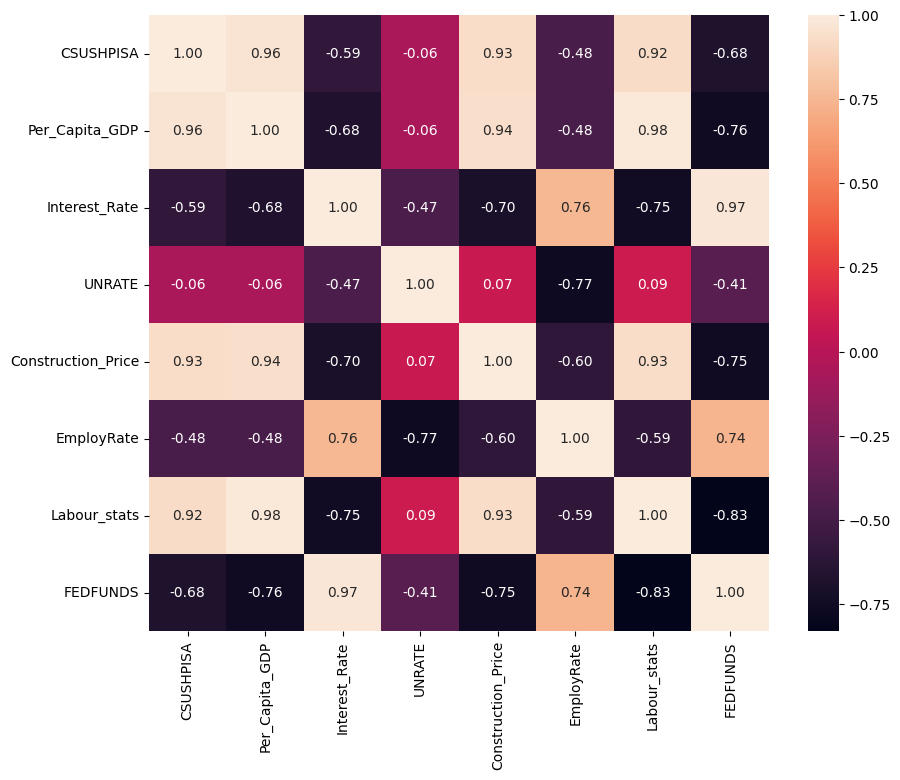

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# Time Series Analysis

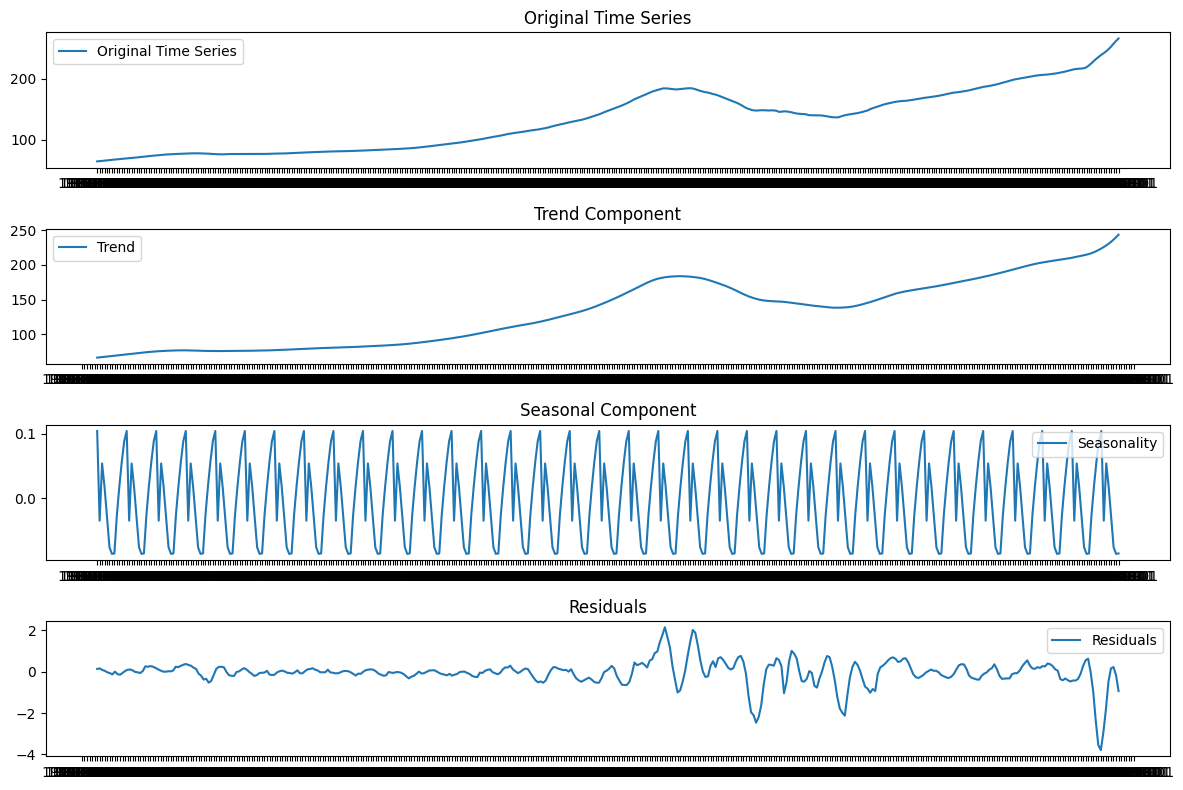

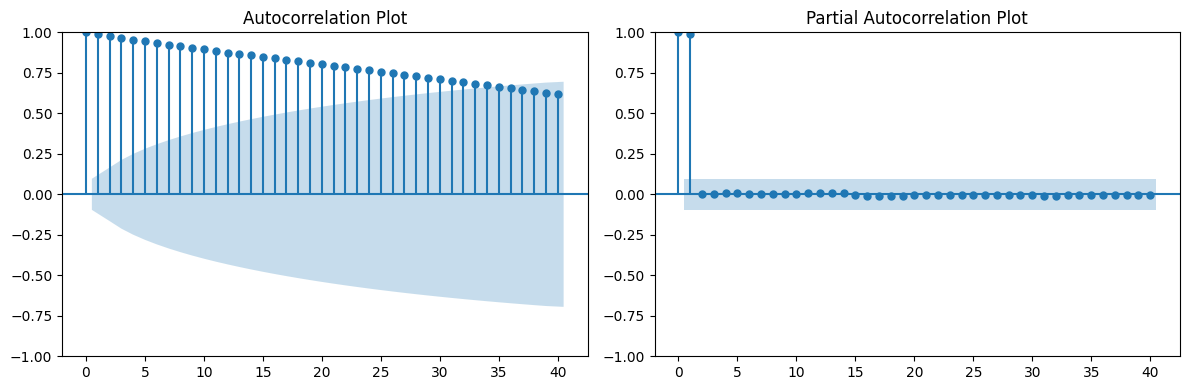

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

# Data Visualization

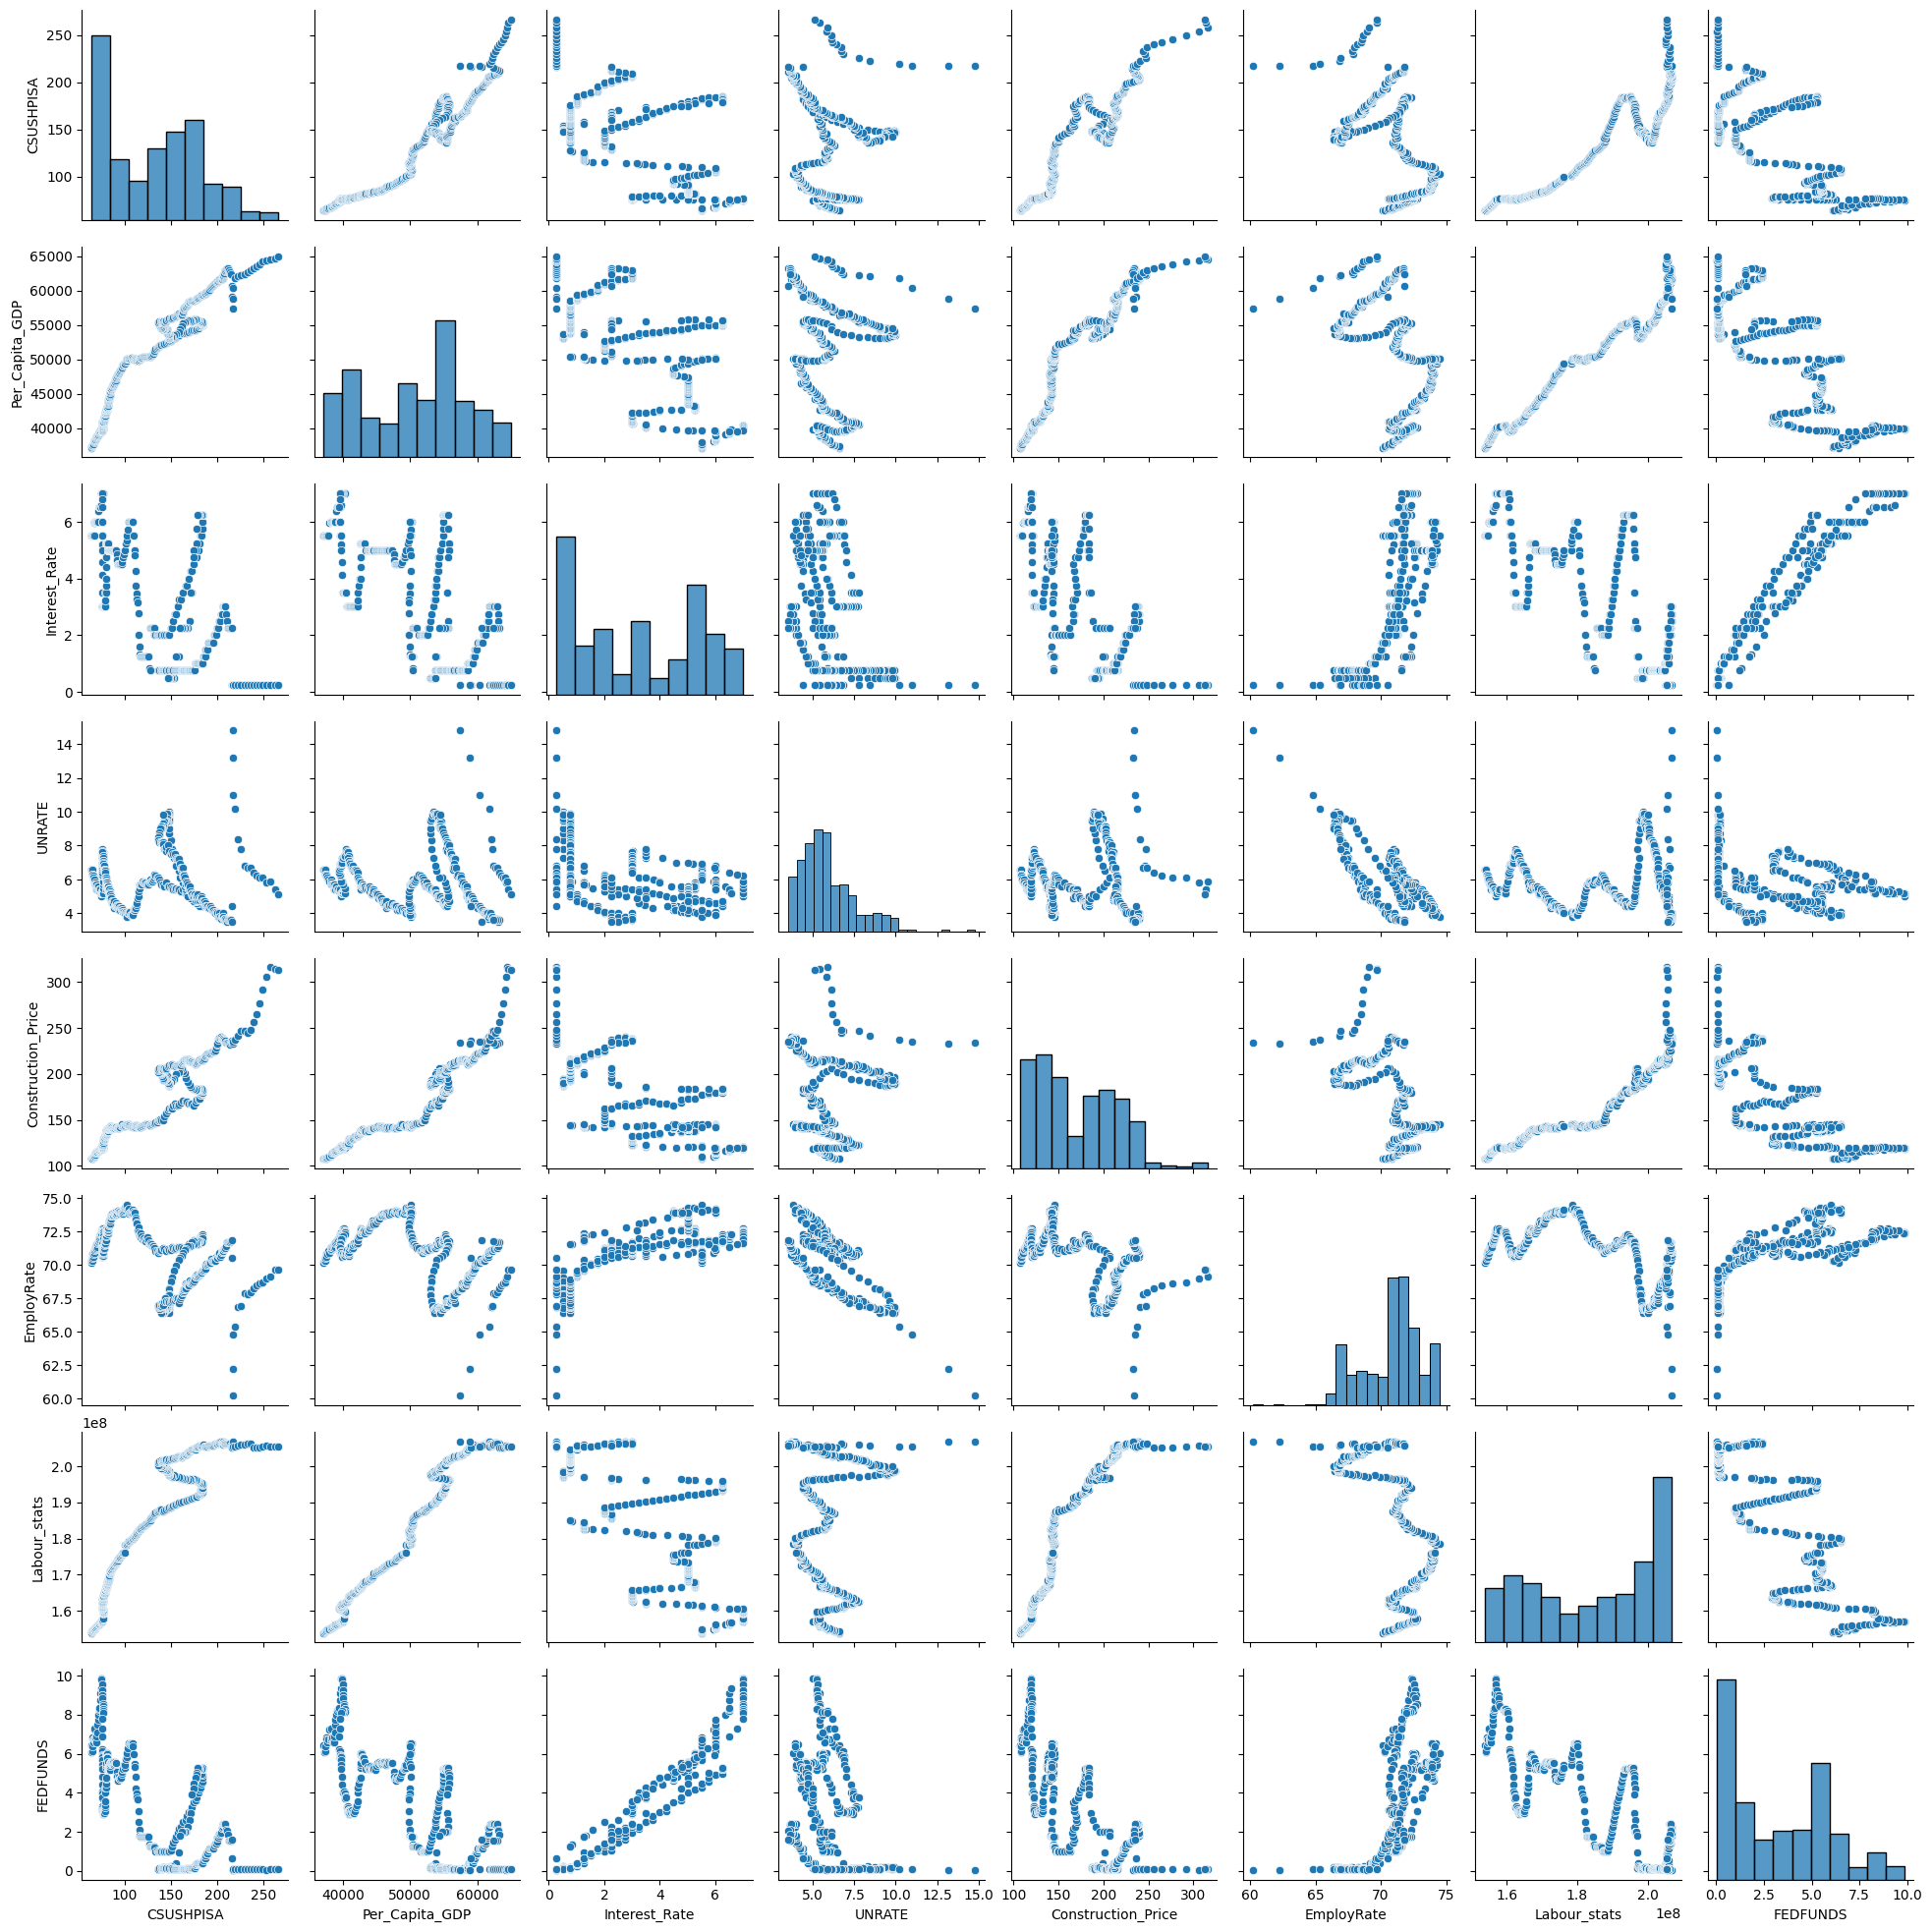

In [ ]:
  sns.pairplot(house_price_df)

In [ ]:
X = house_price_df.drop('CSUSHPISA', axis=1)
y = house_price_df['CSUSHPISA']

In [ ]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
UNRATE                0.055495
EmployRate            0.476493
Interest_Rate         0.592509
FEDFUNDS              0.682635
Labour_stats          0.922304
Construction_Price    0.932438
Per_Capita_GDP        0.957988
dtype: float64


In [ ]:
# We can remove Unemployment Rate(UNRATE)
X.drop('UNRATE', axis=1, inplace=True)
X

,Per_Capita_GDP,Interest_Rate,Construction_Price,EmployRate,Labour_stats,FEDFUNDS
DATE,,,,,,
1987-01-01,37132.000000,5.50,107.600,70.15294,153840800.0,6.43
1987-02-01,37239.333333,5.50,107.900,70.28275,154054200.0,6.10
1987-03-01,37346.666667,5.50,108.100,70.31600,154195800.0,6.13
1987-04-01,37454.000000,5.50,108.300,70.50911,154342900.0,6.37
1987-05-01,37531.000000,5.50,108.300,70.81410,154526200.0,6.85
...,...,...,...,...,...,...
2021-04-01,64153.000000,0.25,291.800,68.66589,205468000.0,0.07
2021-05-01,64305.666667,0.25,305.900,68.97403,205665700.0,0.06
2021-06-01,64458.333333,0.25,315.700,69.09635,205415500.0,0.08


# Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Elastic Net": ElasticNet(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 95.91044050833051
R-squared: 0.9703736649684889
Coefficients:
Per_Capita_GDP: 81.22812002081535
Interest_Rate: 25.43861795590731
Construction_Price: 5.610403037929455
EmployRate: -12.137415218753599
Labour_stats: -47.395342985875196
FEDFUNDS: -21.49131525524882
Intercept: 132.6584186746988

Model: Elastic Net
Mean Squared Error: 325.25328665387633
R-squared: 0.8995306163809048
Coefficients:
Per_Capita_GDP: 14.044361141537031
Interest_Rate: 0.01570209603735582
Construction_Price: 12.148464078607125
EmployRate: -0.0
Labour_stats: 11.020439356197654
FEDFUNDS: -1.7179779269457551
Intercept: 132.6584186746988

Model: Random Forest
Mean Squared Error: 5.145514992326064
R-squared: 0.9984105718807633
Feature Importance Analysis:
Per_Capita_GDP: 0.3519492550304628
Interest_Rate: 0.002653456049599593
Construction_Price: 0.20535797895781585
EmployRate: 0.014509302043958502
Labour_stats: 0.4112523712408765
FEDFUNDS: 0.014277636677286695

Model: Gradient

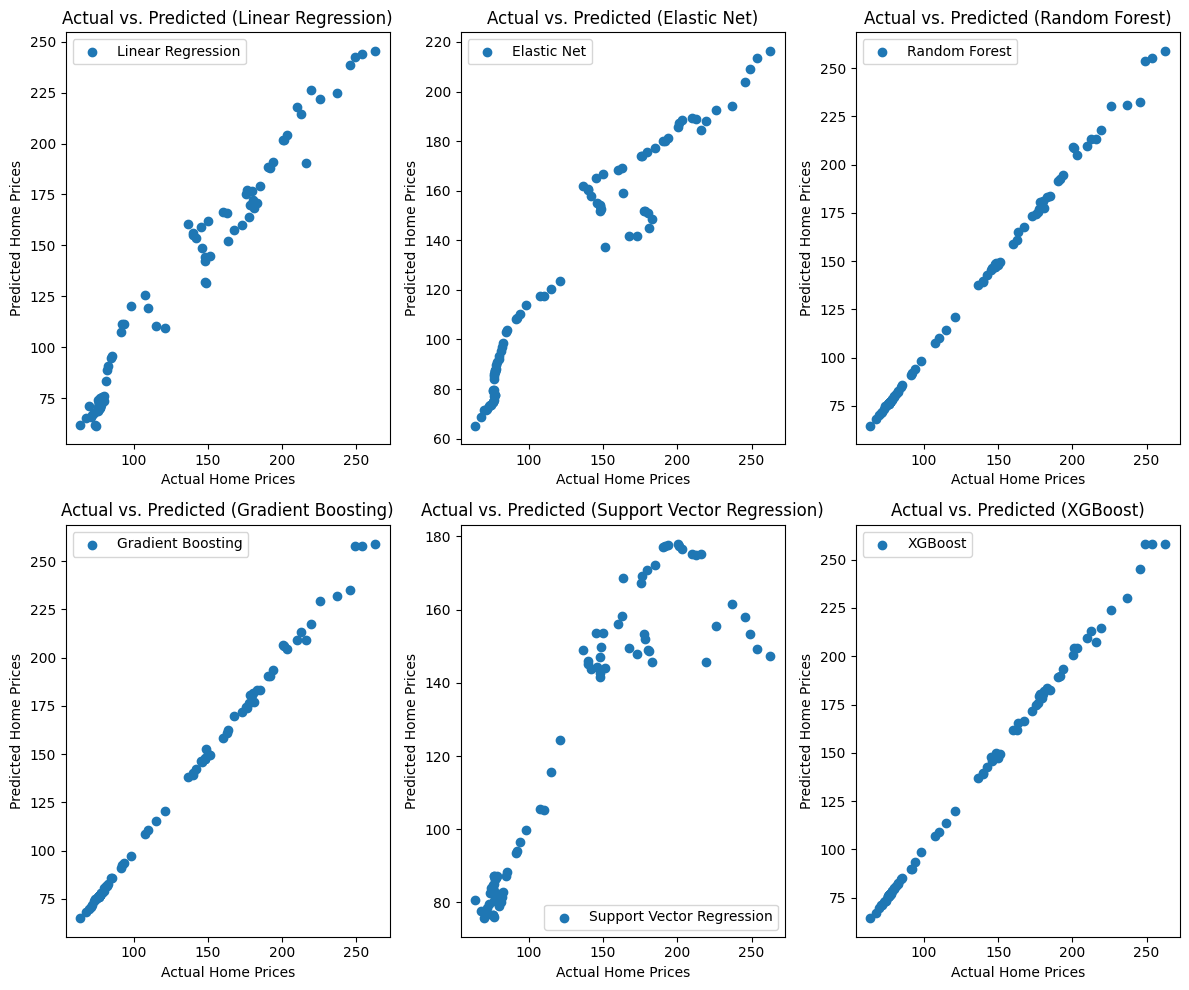


Best Model: XGBRegressor with MSE: 4.197908006427575


In [ ]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")

        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model

    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

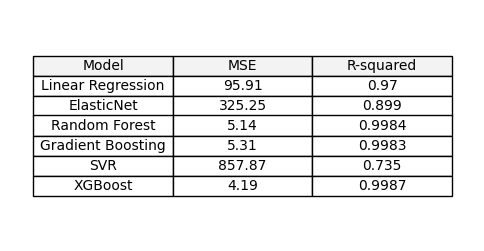

In [ ]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [95.91, 325.25, 5.14, 5.31, 857.87, 4.19],
    'R-squared': [0.970, 0.899, 0.9984, 0.9983, 0.735, 0.9987]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3))

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

Decision:

**Random Forest** and **XGBoost** appear to be strong contenders, as they have low MSE and high R-squared values. Additionally, both models provide insights into feature importance.

**Gradient Boosting** also performs well but with a slightly higher MSE compared to Random Forest and XGBoost.

**Linear Regression** and **ElasticNet** have higher MSE values, indicating potential limitations in predictive accuracy.

**SVR** has a considerably higher MSE and lower R-squared, suggesting lower performance compared to other models.

Champion model: In summary, based on the provided metrics, **XGBoost** appear to be a strong candidate for the best model, with a low MSE and a high R-squared value.

Low MSE: The low MSE indicates that the model's predictions are close to the actual values on average, suggesting good predictive accuracy.

High R-squared: The high R-squared value suggests that a significant portion of the variance in home prices is explained by the model. This indicates strong explanatory power.